In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

# Load data from local memory

Data from https://archive.ics.uci.edu/ml/datasets/Condition+monitoring+of+hydraulic+systems 

In [19]:
df = pd.read_csv("C:/Users/CL9/OneDrive - Science Group/Desktop/SpxFlow/Condition monitoring datasets/Hydraulic Systems Data/hydraulic systems Data.csv")
labels = pd.read_csv("C:/Users/CL9/OneDrive - Science Group/Desktop/SpxFlow/Condition monitoring datasets/Hydraulic Systems Data/labels.csv")
print(len(df),len(labels))

dataset = df
# dataset = df[:len(labels)]

10000 2205


In [20]:
labels.head()

,Datetime,Cooler Condition,Valve Condition,Internal Pump leak,Hydaulic accumulator
0,2022-05-06 00:00:00,0,3,0,3
1,2022-05-06 00:00:01,0,3,0,3
2,2022-05-06 00:00:02,0,3,0,3
3,2022-05-06 00:00:03,0,3,0,3
4,2022-05-06 00:00:04,0,3,0,3


In [21]:
for col in labels.iloc[:,1:].columns:
    print(labels[col].value_counts())

2    741
0    732
1    732
Name: Cooler Condition, dtype: int64
3    1125
0     360
1     360
2     360
Name: Valve Condition, dtype: int64
0    1221
2     492
1     492
Name: Internal Pump leak, dtype: int64
0    808
3    599
2    399
1    399
Name: Hydaulic accumulator, dtype: int64


In [22]:
dataset.head()
dataset = dataset[[col for col in dataset.columns if col not in ["CP"]]]

In [23]:
dataset = dataset.set_index('Datetime').sort_index()
dataset.head()

,FS1,PS1,PS2,PS3,PS4,PS5,SE,VS1
Datetime,,,,,,,,
2022-05-06 00:00:00,0.875070,-0.558801,0.335115,0.590316,-0.60505,1.340065,0.512852,-0.120912
2022-05-06 00:00:01,0.618018,-0.560040,0.332828,0.590316,-0.60505,1.359142,0.486349,-0.120789
2022-05-06 00:00:02,0.360967,-0.555701,0.333036,0.623481,-0.60505,1.388625,0.459846,-0.120667
2022-05-06 00:00:03,0.103915,-0.571197,0.325344,0.882386,-0.60505,1.431983,0.433343,-0.120545
2022-05-06 00:00:04,-0.153137,-0.600330,0.304971,1.309257,-0.60505,1.444123,0.406840,-0.120423


<AxesSubplot:xlabel='Datetime'>

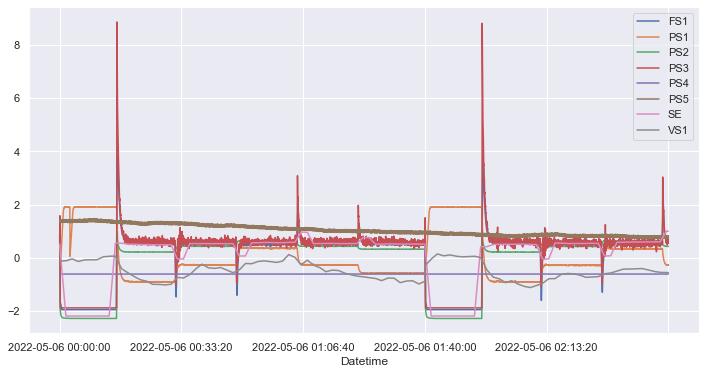

In [24]:
dataset.plot(figsize = (12,6))

In [8]:
# dataset = dataset[["SE","VS1"]]

In [25]:
dataset.index

Index(['2022-05-06 00:00:00', '2022-05-06 00:00:01', '2022-05-06 00:00:02',
       '2022-05-06 00:00:03', '2022-05-06 00:00:04', '2022-05-06 00:00:05',
       '2022-05-06 00:00:06', '2022-05-06 00:00:07', '2022-05-06 00:00:08',
       '2022-05-06 00:00:09',
       ...
       '2022-05-06 02:46:30', '2022-05-06 02:46:31', '2022-05-06 02:46:32',
       '2022-05-06 02:46:33', '2022-05-06 02:46:34', '2022-05-06 02:46:35',
       '2022-05-06 02:46:36', '2022-05-06 02:46:37', '2022-05-06 02:46:38',
       '2022-05-06 02:46:39'],
      dtype='object', name='Datetime', length=10000)

In [26]:
dataset_train = dataset['2022-05-06 00:00:0':'2022-05-06 00:30:00']
dataset_test = dataset['2022-05-06 00:30:00':]
print(len(dataset_train),len(dataset_test))

1801 8200


In [27]:
dataset_test.head()

,FS1,PS1,PS2,PS3,PS4,PS5,SE,VS1
Datetime,,,,,,,,
2022-05-06 00:30:00,0.523202,-0.897850,0.221193,0.581757,-0.60505,1.303644,0.497722,-0.998676
2022-05-06 00:30:01,0.519325,-0.899710,0.221193,0.522915,-0.60505,1.272427,0.497722,-0.998431
2022-05-06 00:30:02,0.515447,-0.896611,0.223688,0.498308,-0.60505,1.249881,0.497722,-0.998187
2022-05-06 00:30:03,0.512041,-0.894751,0.223688,0.498308,-0.60505,1.249881,0.497722,-0.997942
2022-05-06 00:30:04,0.509758,-0.899710,0.221817,0.448025,-0.60505,1.263755,0.497722,-0.997698


# Normalize data

In [28]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train),
                       columns=dataset_train.columns, 
                       index=dataset_train.index)

# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test),
                      columns=dataset_test.columns,  
                      index=dataset_test.index)

# PCA type model for anomaly detection

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [30]:
# Calculate the covariance matrix:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [31]:
# Calculate the Mahalanobis distance:

def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [32]:
# Detecting outliers:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [33]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [34]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [35]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [36]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [37]:
mean_distr = data_train.mean(axis=0)

In [38]:
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

In [39]:
print("MD Threshold is:",threshold)

MD Threshold is: 3.962522728547681


c:\Users\CL9\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(0.0, 15.0)

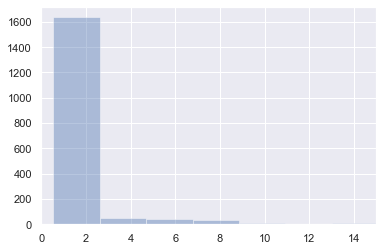

In [40]:
# Visualizing the square of the Mahalanobis distance, which should then ideally follow a χ2 distribution.

plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

Text(0.5, 0, 'Mahalanobis dist')

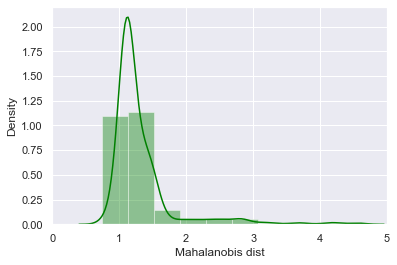

In [41]:
# Visualizing the distribution of the Mahalanobis distance

plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

From the above distributions, the calculated threshold value of 3.69 for flagging an anomaly seems reasonable (defined as 3 standard deviations from the center of the distribution)

In [42]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
Datetime,,,
2022-05-06 00:30:00,1.458838,3.962523,False
2022-05-06 00:30:01,1.529686,3.962523,False
2022-05-06 00:30:02,1.578732,3.962523,False
2022-05-06 00:30:03,1.577664,3.962523,False
2022-05-06 00:30:04,1.551869,3.962523,False


In [43]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata
# anomaly_alldata.to_csv('Anomaly_distance.csv')

,Mob dist,Thresh,Anomaly
Datetime,,,
2022-05-06 00:00:00,2.395089,3.962523,False
2022-05-06 00:00:01,2.349030,3.962523,False
2022-05-06 00:00:02,2.330120,3.962523,False
2022-05-06 00:00:03,2.355449,3.962523,False
2022-05-06 00:00:04,2.326509,3.962523,False
...,...,...,...
2022-05-06 02:46:35,1.361258,3.962523,False
2022-05-06 02:46:36,1.360445,3.962523,False
2022-05-06 02:46:37,1.364105,3.962523,False


<AxesSubplot:xlabel='Datetime'>

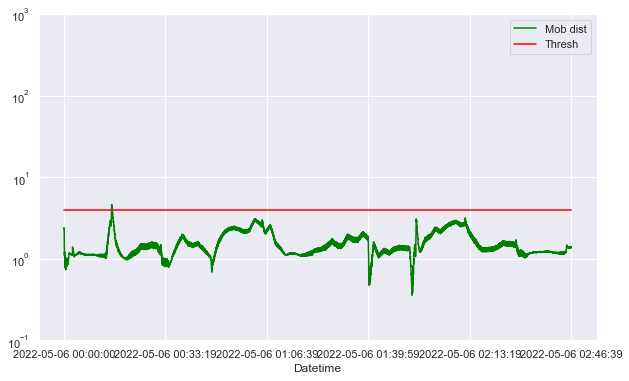

In [44]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

In [45]:
labels.head()

,Datetime,Cooler Condition,Valve Condition,Internal Pump leak,Hydaulic accumulator
0,2022-05-06 00:00:00,0,3,0,3
1,2022-05-06 00:00:01,0,3,0,3
2,2022-05-06 00:00:02,0,3,0,3
3,2022-05-06 00:00:03,0,3,0,3
4,2022-05-06 00:00:04,0,3,0,3


In [59]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    name="Internal Pump leak Condition [0-2] (No leak - severe leak)",
    mode="lines", x=labels.Datetime, y=labels["Internal Pump leak"]
))

fig.add_trace(go.Scatter(
    name="Hydaulic accumulator Condition [0-3] (Close to Total Failure - Optimal Pressure)",
    mode="lines", x=labels.Datetime, y=labels["Hydaulic accumulator"]
))

fig.add_trace(go.Scatter(
    name="Valve Condition [0-3] (Failure - Optimal)",
    mode="lines", x=labels.Datetime, y=labels["Valve Condition"]
))

fig.add_trace(go.Scatter(
    name="Mob distance",
    mode="lines", x=anomaly_alldata.index, y=anomaly_alldata["Mob dist"]
))

fig.add_trace(go.Scatter(
    name="Threshold",
    mode="lines", x=anomaly_alldata.index, y=anomaly_alldata["Thresh"]
))

fig.update_layout(title_text="Actual Machine Failure")
fig.update_layout(hovermode="x",
    legend=dict(
        # x=0.01,
        # y=0.95,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
    )
)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="mob distance")
fig.show()